In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# Amr Ahmed ---> Breast Cancer (Multinomial Naive Bayes Model)

In [44]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [45]:
data = pd.read_csv('data.csv')

In [46]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [48]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [49]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
nb = MultinomialNB()
nb.fit(X_train_scaled, y_train)

MultinomialNB()

In [53]:
y_pred_nb = nb.predict(X_test_scaled)

In [54]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.8538011695906432


In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       108
           1       0.95      0.63      0.76        63

    accuracy                           0.85       171
   macro avg       0.89      0.81      0.83       171
weighted avg       0.87      0.85      0.85       171



In [56]:
import time

In [57]:
start_time = time.time()
nb.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print("Time taken: " , training_time , "Seconds")

Time taken:  0.0020923614501953125 Seconds


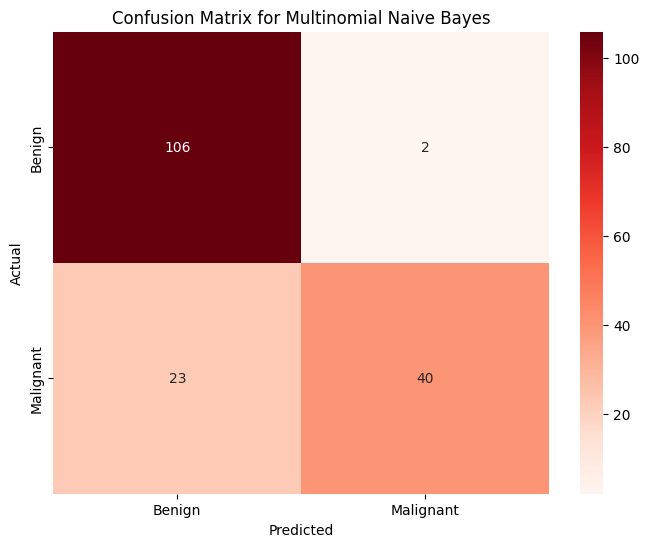

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

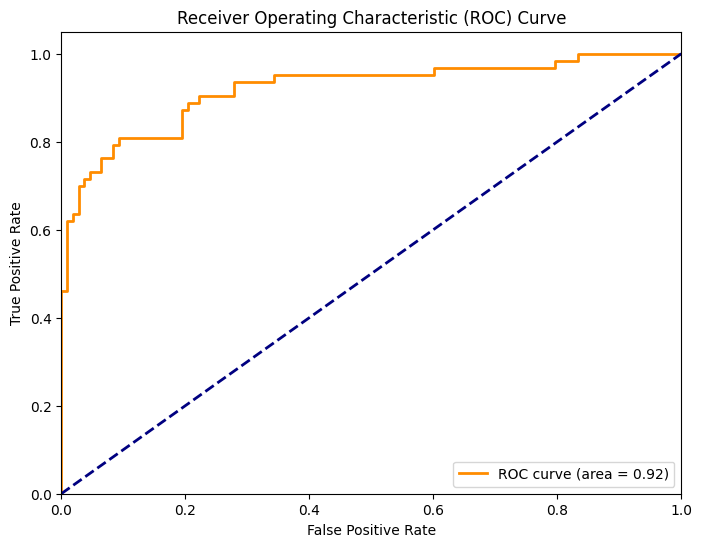

In [66]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


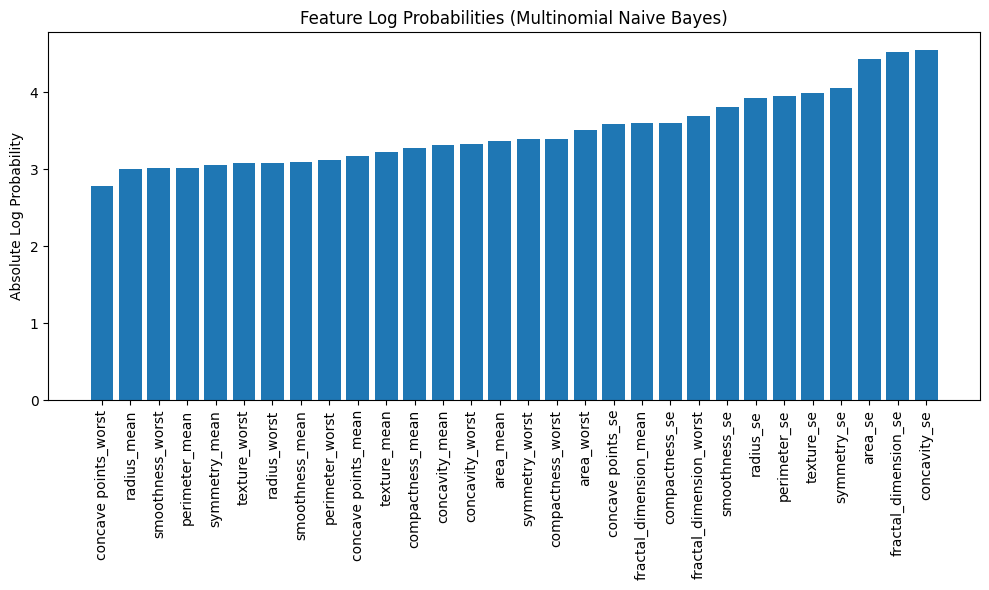

In [75]:
feature_log_prob = nb.feature_log_prob_

# the log probabilities for class 1 ---> Malignant
malignant_log_prob = feature_log_prob[1]

# Sort the features by their importance ---> absolute log probability
indices = np.argsort(malignant_log_prob)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Log Probabilities (Multinomial Naive Bayes)")
plt.bar(range(X_train.shape[1]), np.abs(malignant_log_prob[indices]), align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.ylabel("Absolute Log Probability")
plt.tight_layout()
plt.show()

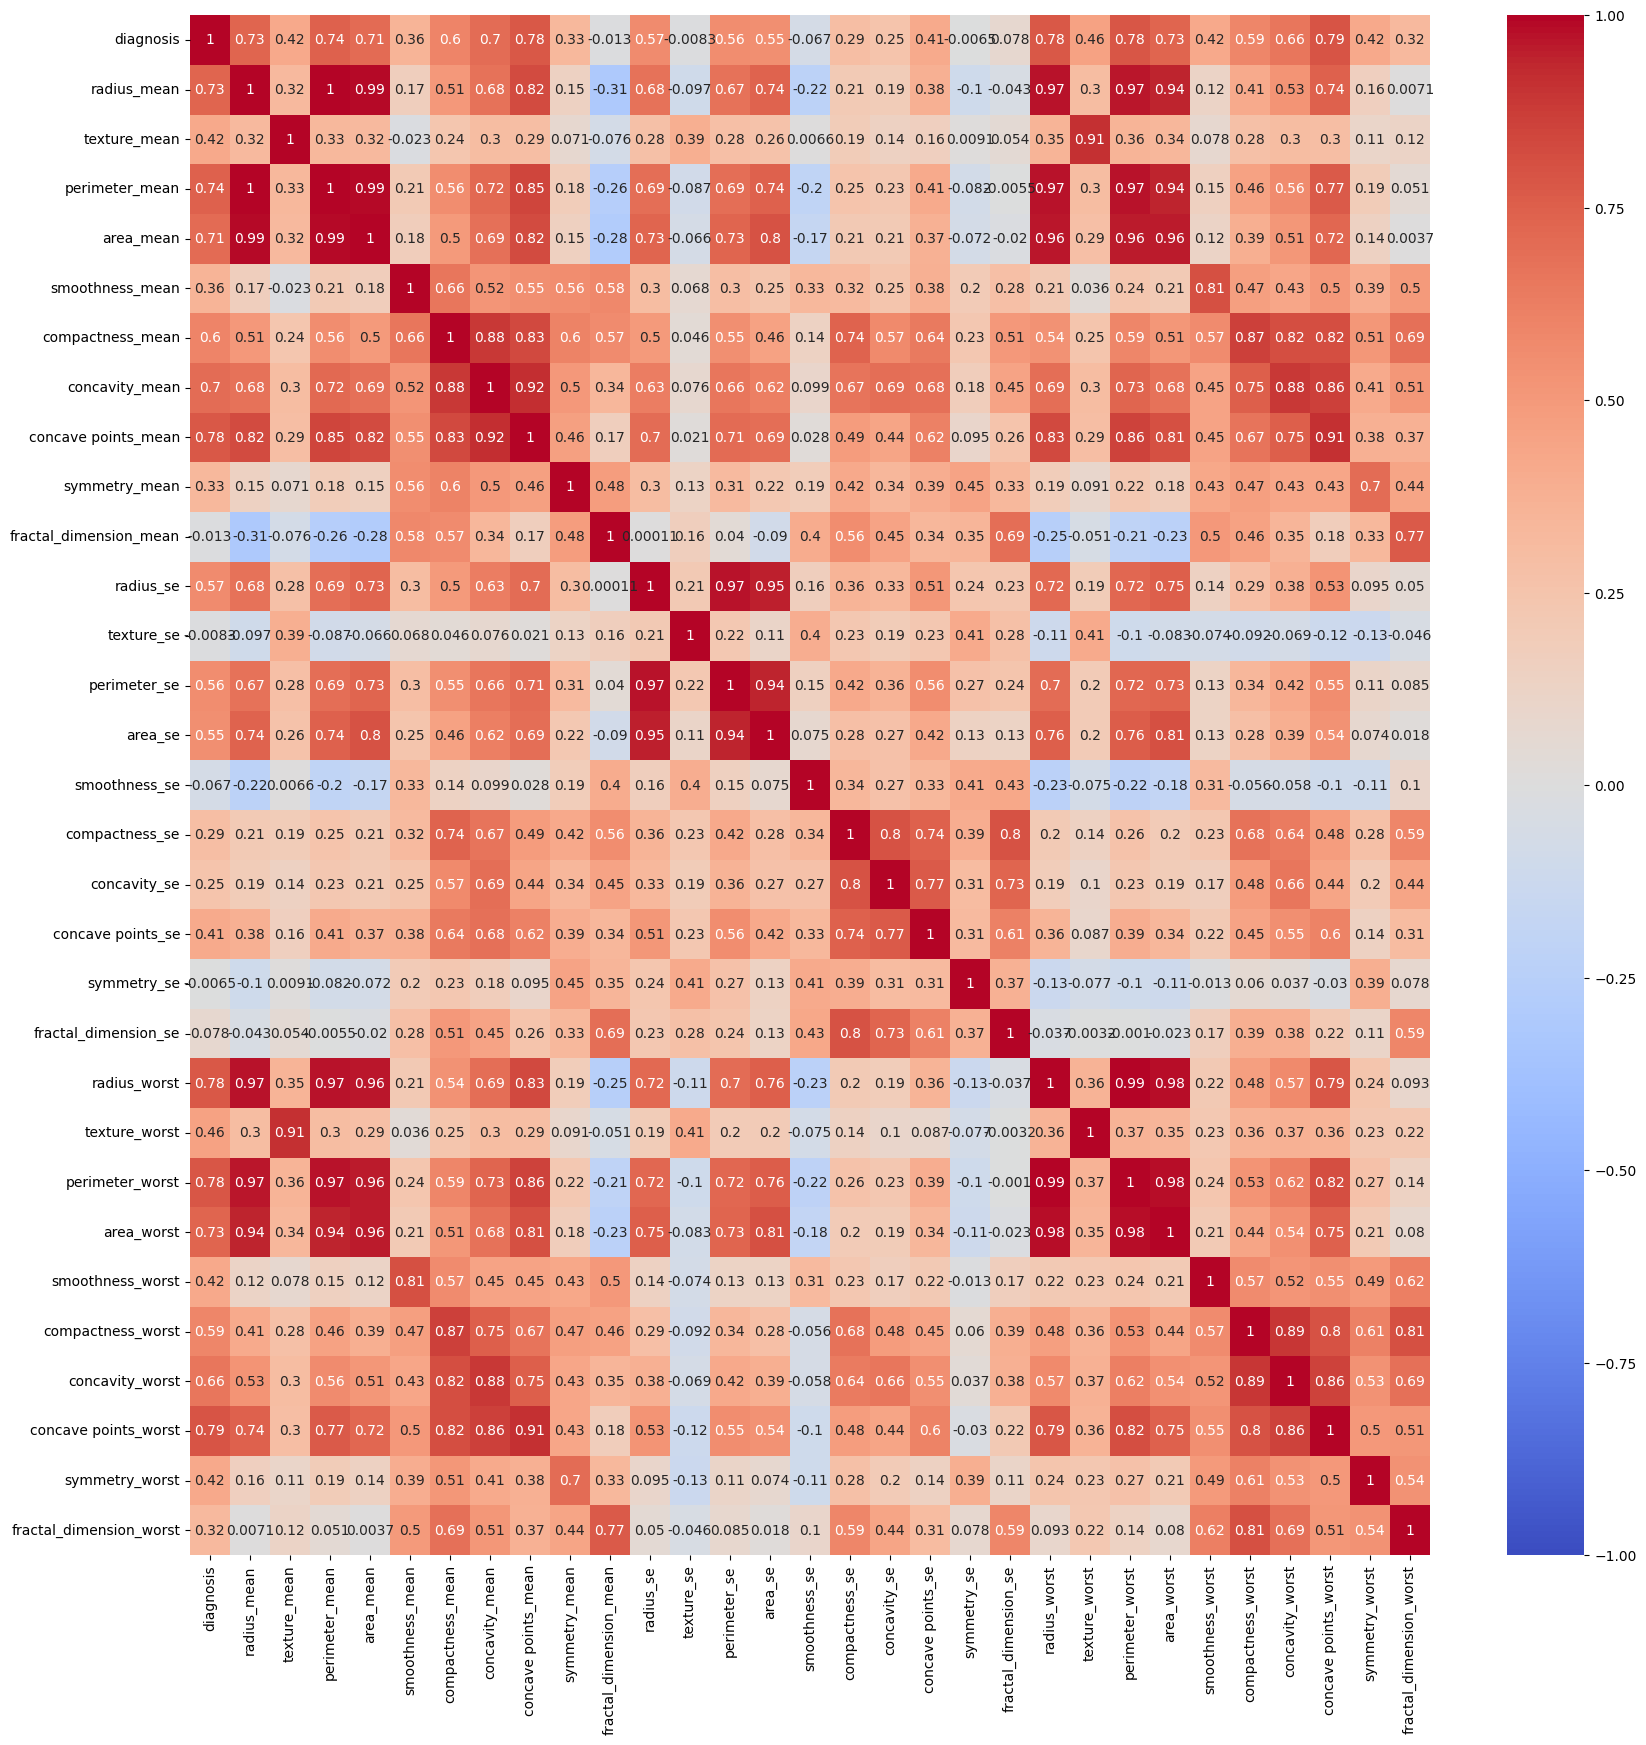

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() , annot=True , cmap="coolwarm", vmin=-1 , vmax=1 , center=0)
plt.show()